In [1]:
import tensorflow as tf### models
import pandas as pd ### reading and processing data
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import tensorflow_datasets as tfds
import os
from tensorflow.keras.applications.efficientnet import preprocess_input
import shutil
from sklearn.model_selection import train_test_split
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing import image
#import seaborn as sns ### visualization
# if you want to use TPU comment seaborn lib

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
plant='/kaggle/input/plantv'
categories = os.listdir('/kaggle/input/plantv/Plant_leave_diseases_dataset_with_augmentation')
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))
#print classes in plant village dataset 

List of categories =  ['Corn___Northern_Leaf_Blight', 'Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Background_without_leaves', 'Potato___healthy', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn___healthy', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Corn___Common_rust', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___Leaf_Mold', 'Cherry___healthy',

In [3]:
#creating palnt village dataframe (path,class)
plant_dataset_path = '/kaggle/input/plantv/Plant_leave_diseases_dataset_with_augmentation'

# Create lists to store file paths and corresponding classes
file_paths = []
classes = []

# Iterate through each class directory
for class_folder in os.listdir(plant_dataset_path):
    class_path = os.path.join(plant_dataset_path, class_folder)
    
    # Check if it's a directory
    if os.path.isdir(class_path):
        # Iterate through each image file in the class directory
        for image_file in os.listdir(class_path):
            # Construct the full file path
            image_path = os.path.join(class_path, image_file)
            
            # Append the file path and class to the lists
            file_paths.append(image_path)
            classes.append(class_folder)

# Create a DataFrame
df = pd.DataFrame({'file_path': file_paths, 'class': classes})

# Display the DataFrame
len(df)


61486

In [5]:
df["class"].value_counts()

class
Orange___Haunglongbing_(Citrus_greening)         5507
Tomato___Tomato_Yellow_Leaf_Curl_Virus           5357
Soybean___healthy                                5090
Peach___Bacterial_spot                           2297
Tomato___Bacterial_spot                          2127
Tomato___Late_blight                             1909
Squash___Powdery_mildew                          1835
Tomato___Septoria_leaf_spot                      1771
Tomato___Spider_mites Two-spotted_spider_mite    1676
Apple___healthy                                  1645
Tomato___healthy                                 1591
Blueberry___healthy                              1502
Pepper,_bell___healthy                           1478
Tomato___Target_Spot                             1404
Grape___Esca_(Black_Measles)                     1383
Corn___Common_rust                               1192
Grape___Black_rot                                1180
Corn___healthy                                   1162
Background_without_lea

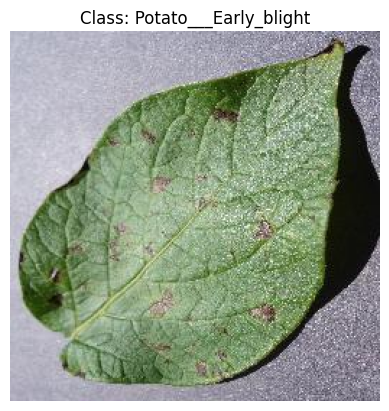

In [7]:
random_row = df.sample()

# Get the file path and class label
file_path = random_row['file_path'].values[0]
class_label = random_row['class'].values[0]

# Open the image using PIL
image = Image.open(file_path)

# Display the image
plt.imshow(image)
plt.title(f"Class: {class_label}")
plt.axis('off')
plt.show()

**#rice **dataset****

In [8]:
train_dataset_path='/kaggle/input/riceleafs/RiceLeafs/train'
val_dataset_path='/kaggle/input/riceleafs/RiceLeafs/validation'

In [9]:
#creat rice dataframe 
# Function to get a DataFrame from a directory
def create_dataframe_from_directory(directory):
    file_paths = []
    class_labels = []
    for class_label in os.listdir(directory):
        class_path = os.path.join(directory, class_label)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                file_path = os.path.join(class_path, filename)
                file_paths.append(file_path)
                class_labels.append(class_label)
    return pd.DataFrame({'file_path': file_paths, 'class': class_labels})

# Create DataFrames for the training and validation datasets
df_train = create_dataframe_from_directory(train_dataset_path)
df_val = create_dataframe_from_directory(val_dataset_path)

# Concatenate the DataFrames to create a unified dataset
rice_df = pd.concat([df_train, df_val], ignore_index=True)

# Display the first few rows of the combined DataFrame
print(rice_df.head())

# Optional: Save the combined DataFrame to a CSV file
rice_df.to_csv('/kaggle/working/combined_dataset.csv', index=False)
len(rice_df)


                                           file_path  class
0  /kaggle/input/riceleafs/RiceLeafs/train/Hispa/...  Hispa
1  /kaggle/input/riceleafs/RiceLeafs/train/Hispa/...  Hispa
2  /kaggle/input/riceleafs/RiceLeafs/train/Hispa/...  Hispa
3  /kaggle/input/riceleafs/RiceLeafs/train/Hispa/...  Hispa
4  /kaggle/input/riceleafs/RiceLeafs/train/Hispa/...  Hispa


3355

In [10]:
rice_df["class"].value_counts()

class
Healthy      1488
LeafBlast     779
Hispa         565
BrownSpot     523
Name: count, dtype: int64

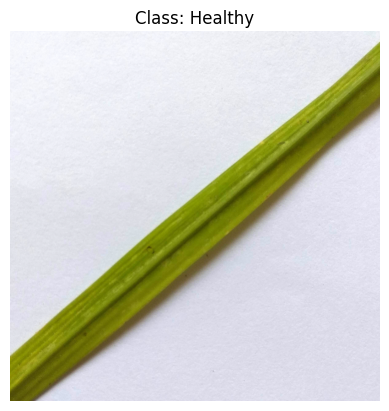

In [11]:
random_row = rice_df.sample()

# Get the file path and class label
file_path = random_row['file_path'].values[0]
class_label = random_row['class'].values[0]

# Open the image using PIL
image = Image.open(file_path)

# Display the image
plt.imshow(image)
plt.title(f"Class: {class_label}")
plt.axis('off')
plt.show()

In [12]:
#concat village dataframe with rice dataframe 
df_final = pd.concat([df, rice_df], ignore_index=True)
df_final.head()

,file_path,class
0,/kaggle/input/plantv/Plant_leave_diseases_data...,Corn___Northern_Leaf_Blight
1,/kaggle/input/plantv/Plant_leave_diseases_data...,Corn___Northern_Leaf_Blight
2,/kaggle/input/plantv/Plant_leave_diseases_data...,Corn___Northern_Leaf_Blight
3,/kaggle/input/plantv/Plant_leave_diseases_data...,Corn___Northern_Leaf_Blight
4,/kaggle/input/plantv/Plant_leave_diseases_data...,Corn___Northern_Leaf_Blight


In [13]:
len(df_final)

64841

In [ ]:
#resize dataframe and conver all images to RGB
# Set the output directory for resized images in the working directory
#save the output 
output_directory = '/kaggle/working/deep_learning/resizeV'

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# Batch size for processing
batch_size = 50  # You can adjust this based on your memory constraints

# Calculate the number of batches
num_batches = len(df_final) // batch_size + 1

# Helper function to handle RGBA images
def handle_rgba(image):
    if image.mode == 'RGBA':
        # Remove alpha channel before resizing
        return image.convert('RGB')
    return image

# Iterate over batches
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size

    # Slice the DataFrame for the current batch
    batch_df = df_final.iloc[start_idx:end_idx]

    # Iterate over each row in the batch
    for index, row in batch_df.iterrows():
        input_path = row['file_path']
        class_label = row['class']

        # Open and handle RGBA images
        with Image.open(input_path) as img:
            img = handle_rgba(img)

            # Resize the image
            resized_img = img.resize((300, 300))

            # Save the resized image to the output directory with the original format
            output_filename = f"{class_label}_{index}{os.path.splitext(input_path)[-1]}"  # Keep the original file extension
            output_path = os.path.join(output_directory, output_filename)
            resized_img.save(output_path)

# Create a ZIP archive of the resized images
shutil.make_archive('/kaggle/working/deep_learning_resized_images', 'zip', output_directory)


******************************


##############################


******************************

In [14]:
#creat a dataframe 
paths = []
classes = []

# Iterate over files in the resize folder
for filename in os.listdir('/kaggle/input/resizev'):
    # Extract class and index from the filename
    parts = os.path.splitext(filename)[0].split('_')
    class_label = parts[0]
    index = parts[1]

    # Create the full path
    full_path = os.path.join('/kaggle/input/resizev', filename)

    # Append to the lists
    classes.append(class_label)
    paths.append(full_path)

# Create a DataFrame
df_resized = pd.DataFrame({'path': paths, 'class': classes})

df_resized.head()

,path,class
0,/kaggle/input/resizev/Tomato___Target_Spot_420...,Tomato
1,/kaggle/input/resizev/Tomato___healthy_4364.JPG,Tomato
2,/kaggle/input/resizev/Grape___healthy_4788.JPG,Grape
3,/kaggle/input/resizev/Soybean___healthy_15079.JPG,Soybean
4,/kaggle/input/resizev/Potato___Early_blight_53...,Potato


In [15]:
# fixing the dataframe classes
# Function to extract class label from image path
def extract_class_from_path(image_path):

    # Extract the filename without the extension
    filename = os.path.splitext(os.path.basename(image_path))[0]
    
    # Extract the class label from the filename
    # Assuming the class label is everything before the last underscore
    class_label = filename.rsplit('_', 1)[0]
    
    # If the class label contains "image", extract the number in parentheses
    if "image" in class_label:
        class_label = "image_" + ''.join(filter(str.isdigit, class_label))

    return class_label

# Apply the function to create a new 'class' column
df_resized['class'] = df_resized['path'].apply(extract_class_from_path)

# Display the updated DataFrame
df_resized['class'].value_counts()


class
Orange___Haunglongbing_(Citrus_greening)         5507
Tomato___Tomato_Yellow_Leaf_Curl_Virus           5357
Soybean___healthy                                5090
Peach___Bacterial_spot                           2297
Tomato___Bacterial_spot                          2127
Tomato___Late_blight                             1909
Squash___Powdery_mildew                          1835
Tomato___Septoria_leaf_spot                      1771
Tomato___Spider_mites Two-spotted_spider_mite    1676
Apple___healthy                                  1645
Tomato___healthy                                 1591
Blueberry___healthy                              1502
Healthy                                          1488
Pepper,_bell___healthy                           1478
Tomato___Target_Spot                             1404
Grape___Esca_(Black_Measles)                     1383
Corn___Common_rust                               1192
Grape___Black_rot                                1180
Corn___healthy        

In [16]:
unique_classes = df_resized['class'].unique()

# Display the unique values
print(len(unique_classes))

43


In [17]:
df_resized.head()

,path,class
0,/kaggle/input/resizev/Tomato___Target_Spot_420...,Tomato___Target_Spot
1,/kaggle/input/resizev/Tomato___healthy_4364.JPG,Tomato___healthy
2,/kaggle/input/resizev/Grape___healthy_4788.JPG,Grape___healthy
3,/kaggle/input/resizev/Soybean___healthy_15079.JPG,Soybean___healthy
4,/kaggle/input/resizev/Potato___Early_blight_53...,Potato___Early_blight


In [18]:

def process_image(image_path):
    # Load image using PIL
    img = Image.open(image_path)

    # Convert image to array
    img_array = np.array(img)

    # Normalize the image using EfficientNet B3 preprocessing
    img_array = preprocess_input(np.expand_dims(img_array, axis=0))

    return img_array

# Apply the process_image function to each row in the DataFrame
df_resized['processed_image'] = df_resized['path'].apply(process_image)


In [19]:
data = df_resized.iloc[:, 1:3]
len(data)


64841

In [21]:
#tensors 
data["processed_image"][1].shape

(1, 300, 300, 3)

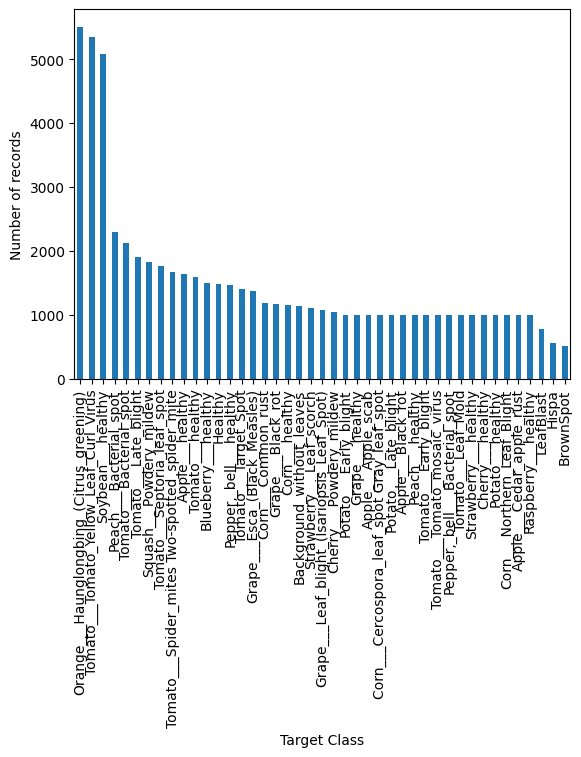

In [22]:
count = data["class"].value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

In [23]:
from sklearn.utils import resample
import pandas as pd

# Assuming df is your DataFrame
# Replace the class labels with your actual class labels
undersample_classes = [
    'Orange___Haunglongbing_(Citrus_greening)',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Soybean___healthy',
    'Peach___Bacterial_spot',
    'Tomato___Bacterial_spot',
    'Tomato___Late_blight',
    'Squash___Powdery_mildew',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Apple___healthy',
    'Tomato___healthy',
    'Blueberry___healthy',
    'Healthy',
    'Pepper,_bell___healthy',
    'Tomato___Target_Spot',
    'Grape___Esca_(Black_Measles)',
    'Corn___Common_rust',
    'Grape___Black_rot',
    'Corn___healthy',
    'Background_without_leaves'
]

oversample_classes = ['LeafBlast', 'Hispa', 'BrownSpot']
desired_undersample_samples = 1000
desired_oversample_samples = 1000

# Separate classes for undersampling
df_undersample = data[data['class'].isin(undersample_classes)]

# Undersample specified classes
df_undersampled = pd.concat([resample(df_undersample[df_undersample['class'] == cls],
                                       replace=False,
                                       n_samples=desired_undersample_samples,
                                       random_state=42) for cls in undersample_classes])

# Separate classes for oversampling
df_oversample = data[data['class'].isin(oversample_classes)]

# Oversample specified classes
df_oversampled = pd.concat([resample(df_oversample[df_oversample['class'] == cls],
                                      replace=True,
                                      n_samples=desired_oversample_samples,
                                      random_state=42) for cls in oversample_classes])

# Leave other classes unchanged
df_remaining = data[~data['class'].isin(undersample_classes + oversample_classes)]

# Combine undersampled, oversampled, and remaining classes
data = pd.concat([df_undersampled, df_oversampled, df_remaining])

# Shuffle the DataFrame
data = data.sample(frac=1, random_state=42)

# Print the value counts to verify the sampling
print(data['class'].value_counts())



class
Strawberry___Leaf_scorch                         1109
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)       1076
Cherry___Powdery_mildew                          1052
Blueberry___healthy                              1000
Pepper,_bell___Bacterial_spot                    1000
Apple___Black_rot                                1000
Corn___Cercospora_leaf_spot Gray_leaf_spot       1000
Apple___Apple_scab                               1000
Corn___Common_rust                               1000
Tomato___Spider_mites Two-spotted_spider_mite    1000
Hispa                                            1000
Potato___Early_blight                            1000
Apple___healthy                                  1000
Soybean___healthy                                1000
Potato___healthy                                 1000
LeafBlast                                        1000
Pepper,_bell___healthy                           1000
Tomato___Early_blight                            1000
Tomato___Late_blight  

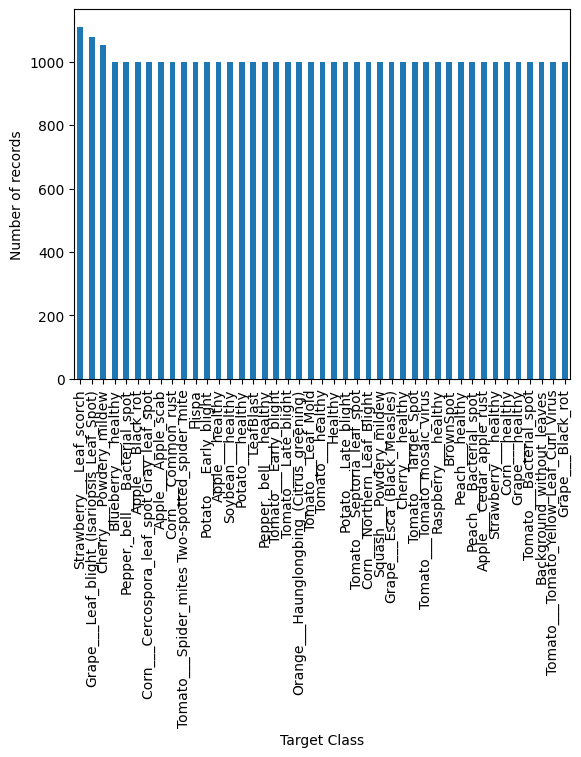

In [24]:
count = data["class"].value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

In [25]:
len(data["processed_image"]),len(data["class"])

(43237, 43237)

In [ ]:
# dont run this 
#creating zip file to donwload data 
#shutil.make_archive('/kaggle/1/final_datav', 'zip', )


In [ ]:
#data=pd.read_csv("/kaggle/input/final-datav/final_datav.csv")
#data.head()

In [26]:
from tensorflow.keras.applications import EfficientNetB3
from sklearn.preprocessing import LabelEncoder

#imagenet weights 
efficientnetb3_weights_path = '/kaggle/input/efnetb3/efficientnetb3_notop.h5'

# Build the EfficientNetB3 model
base_model = EfficientNetB3(weights=efficientnetb3_weights_path, include_top=False, input_shape=(300, 300, 3))
base_model.trainable = False

2024-01-09 06:08:25.494946: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-09 06:08:25.495053: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-09 06:08:25.495150: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-09 06:08:25.495216: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-09 06:08:25.495304: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-09 06:08:25.495483: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-09 06:08:25.495585: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

In [27]:
label_encoder = LabelEncoder()
data['class_encoded'] = label_encoder.fit_transform(data['class'])


In [28]:
# Split the data into training (80%), validation (10%), and test (10%)
train_df, temp_df = train_test_split(data, test_size=0.2, random_state=42)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [29]:
# Reset index for each subset
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [30]:
# Set the number of classes based on your dataset
num_classes = len(data['class'].unique())
num_classes

43

In [31]:
# Extract NumPy arrays from the processed_image column
train_images = np.array(train_df['processed_image'].to_list())
valid_images = np.array(valid_df['processed_image'].to_list())
test=np.array(test_df['processed_image'].to_list())

In [32]:
# Extract class labels
train_labels = train_df['class_encoded'].to_numpy()
valid_labels = valid_df['class_encoded'].to_numpy()
test_labels=test_df['class_encoded'].to_numpy()

In [33]:
# Reshape the input images
train_images = train_images.reshape((-1,300,300,3))
valid_images = valid_images.reshape((-1,300,300,3))
test=test.reshape((-1,300,300,3))

In [34]:
# improve performance by allowing certain computations to be compiled at runtime.
tf.config.optimizer.set_jit(True)

In [35]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
model = models.Sequential([
    layers.InputLayer(input_shape=(300, 300, 3)),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(43, activation='softmax')
])

In [36]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 10, 10, 1536)      10783535  
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dense_1 (Dense)             (None, 43)                11051     
                                                                 
Total params: 11188058 (42.68 MB)
Trainable params: 404523 (1.54 MB)
Non-trainable params: 10783535 (41.14 MB)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_filepath = '/kaggle/working/best_model_epoch_{epoch:02d}.h5'
model_checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    save_best_only=False,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

In [ ]:
# Set the batch size and image size
# Set the number of epochs and bathces 
#TPU can handle many bathces 
batch_size=1000
image_size=(300,300)
epochs=5

In [ ]:
import time
# EAT 
class TimeEstimationCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        elapsed_time = time.time() - self.epoch_start_time
        remaining_time = elapsed_time * (epochs - epoch - 1)
        print(f'Epoch {epoch + 1}/{epochs} - ETA: {remaining_time:.2f} seconds')

In [ ]:
#save epoch information
class DetailedHistory(Callback):
    def __init__(self, filename_prefix):
        super(DetailedHistory, self).__init__()
        self.filename_prefix = filename_prefix
        self.details = {'epochs': [], 'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}

    def on_epoch_end(self, epoch, logs=None):
        self.details['epochs'].append(epoch + 1)
        self.details['loss'].append(logs['loss'])
        self.details['val_loss'].append(logs['val_loss'])
        self.details['accuracy'].append(logs['accuracy'])
        self.details['val_accuracy'].append(logs['val_accuracy'])

        # Save details to a CSV file within Kaggle working directory
        filename = f'/kaggle/working/{self.filename_prefix}_epoch_details.csv'
        df = pd.DataFrame(self.details)
        df.to_csv(filename, index=False)

# Create the DetailedHistory callback
detailed_history = DetailedHistory('details')



In [ ]:
time_estimation_callback = TimeEstimationCallback()

resume_epoch = 1  # Replace with the epoch number you want to resume from

# Load the weights from the saved checkpoint
#replace every check point here to cont training 
model.load_weights(f'/kaggle/working/best_model_epoch_03.h5')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model starting from the next epoch
  # Replace with the desired number of total epochs
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    initial_epoch=1,  # Set the initial epoch to resume training
    batch_size=batch_size,  # Adjust batch size as needed
    validation_data=(valid_images, valid_labels),
    callbacks=[model_checkpoint,time_estimation_callback]
)

In [ ]:
# Save the model
model.save('/kaggle/working/final_model.h5')

In [38]:
#preformance was written  manualy 
data = {
    'epochs': [1, 2, 3, 4, 5],
    'loss': [0.589114, 0.401643, 0.1793, 0.1570, 0.1339],
    'val_loss': [0.457089, 0.265087, 0.1731, 0.1901, 0.1652],
    'accuracy': [0.809795, 0.871144, 0.9330, 0.9429, 0.9494],
    'val_accuracy': [0.862858, 0.913737, 0.9415, 0.9383, 0.9445]
}

df = pd.DataFrame(data)
print(df)

   epochs      loss  val_loss  accuracy  val_accuracy
0       1  0.589114  0.457089  0.809795      0.862858
1       2  0.401643  0.265087  0.871144      0.913737
2       3  0.179300  0.173100  0.933000      0.941500
3       4  0.157000  0.190100  0.942900      0.938300
4       5  0.133900  0.165200  0.949400      0.944500


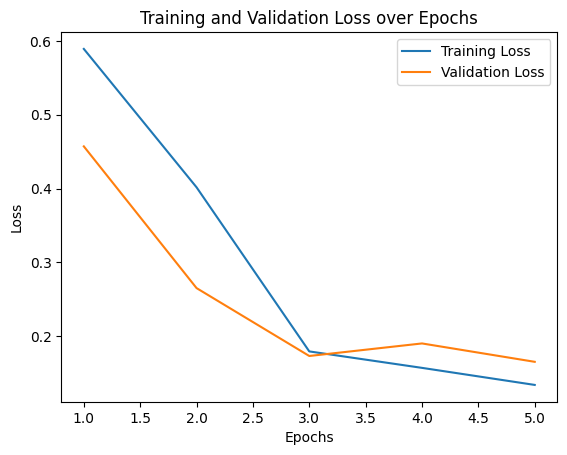

In [39]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the loss and val_loss data
epochs = df['epochs']
train_loss = df['loss']
val_loss = df['val_loss']

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.savefig('loss_curve.png')
plt.show()


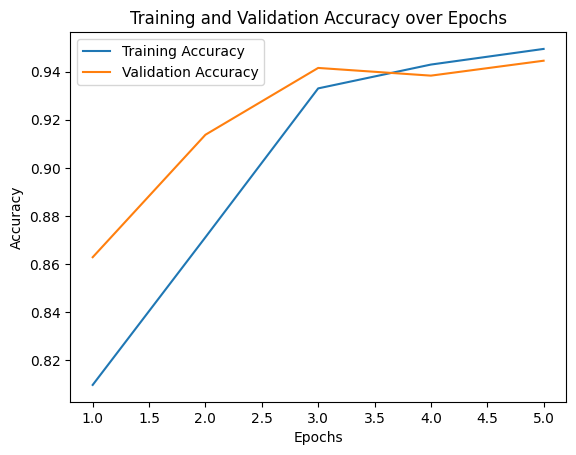

In [40]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the accuracy and val_accuracy data
epochs = df['epochs']
train_accuracy = df['accuracy']
val_accuracy = df['val_accuracy']

plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.savefig('accuracy_curve.png')
plt.show()


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
saved_model = load_model('/kaggle/input/finalmodel/final_model.h5')

# Evaluate on the test dataset
test_loss, test_accuracy = saved_model.evaluate(test, test_labels)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

130/136 [===========================>..] - ETA: 9s - loss: 0.1604 - accuracy: 0.9471 